# Medical Diagnosis with Naive Bayes

You work for a medical research institute, and your task is to develop a diagnostic system using the Naive Bayes algorithm. You have a dataset with various medical test results, patient information, and corresponding diagnoses (e.g., presence or absence of a medical condition). Your goal is to create a classification model to aid in the medical diagnosis process. Answer the following questions based on this case study:

1. Data Exploration:

a. Load and explore the medical dataset using Python libraries like pandas. Describe the features, labels, and the distribution of diagnoses.

2. Data Preprocessing:

a. Explain the necessary data preprocessing steps for preparing the medical data. This may include handling missing values, normalizing or scaling features, and encoding categorical variables.

b. Calculate the prior probabilities P(Condition) and P(No Condition) based on the class distribution.

3. Feature Engineering:

a. Describe how to convert the medical test results and patient Information into suitable features for the Naive Bayes model.

b. Discuss the importance of feature selection or dimensionality reduction in medical diagnosis.

4. Implementing Naive Bayes:

a. Choose the appropriate Naive Bayes variant (e.g., Gaussian, Multinomial, or Bernoulli Naive Bayes) for the medical diagnosis task and implement the classifier using Python libraries like scikit-learn.

b. Split the dataset into training and testing sets.

5. Model Training:

a. Train the Naive Bayes model using the feature-engineered dataset. Explain the probability estimation process in Naive Bayes for medical diagnosis.

6. Model Evaluation:

a. Assess the performance of the medical diagnosis model using relevant evaluation metrics, such as accuracy, precision, recall, and F1-score.

b. Interpret the results and discuss the model's ability to accurately classify medical conditions.

7. Laplace Smoothing:

a. Explain the concept of Laplace (add-one) smoothing and discuss its potential application in the context of medical diagnosis.

b. Discuss the impact of Laplace smoothing on model performance.

8. Real-World Application:

a. Describe the importance of accurate medical diagnosis in healthcare and research.

b. Discuss the practical implications of implementing a diagnostic system based on Naive Bayes.

9. Model Limitations:

a. Identify potential limitations of the Naive Bayes approach to medical diagnosis and discuss scenarios in

which it may not perform well.

10. Presentation and Recommendations:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the medical research institute. Highlight the significance of accurate medical diagnosis and the role of Naive

Bayes in healthcare.

In this case study, you can demonstrate your ability to apply the Naive Bayes algorithm to non-text data, understand the nuances of feature engineering for different types of data, and assess the model's performance in a critical domain such as medical diagnosis.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('day4patient.csv')
data.head()

Number  PatientID      name  Cough   place  Gender  Age  cold      fever  \
0       1   15634602  Hargrave    619  France  Female   42     2       0.00   
1       2   15647311      Hill    608   Spain  Female   41     1   83807.86   
2       3   15619304      Onio    502  France  Female   42     8  159660.80   
3       4   15701354      Boni    699  France  Female   39     1       0.00   
4       5   15737888  Mitchell    850   Spain  Female   43     2  125510.82   

   NumOfProducts  HasCrCard  diabeties  EstimatedSalary  Exited  
0              1          1          1        101348.88       1  
1              1          0          1        112542.58       0  
2              3          1          0        113931.57       1  
3              2          0          0         93826.63       0  
4              1          1          1         79084.10       0

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['PatientID']=le.fit_transform(data['PatientID'])
data['name']=le.fit_transform(data['name'])
data['place']=le.fit_transform(data['place'])
data.head()

Number  PatientID  name  Cough  place  Gender  Age  cold      fever  \
0       1       2736  1115    619      0  Female   42     2       0.00   
1       2       3258  1177    608      2  Female   41     1   83807.86   
2       3       2104  2040    502      0  Female   42     8  159660.80   
3       4       5435   289    699      0  Female   39     1       0.00   
4       5       6899  1822    850      2  Female   43     2  125510.82   

   NumOfProducts  HasCrCard  diabeties  EstimatedSalary  Exited  
0              1          1          1        101348.88       1  
1              1          0          1        112542.58       0  
2              3          1          0        113931.57       1  
3              2          0          0         93826.63       0  
4              1          1          1         79084.10       0

In [11]:
data.isna().sum()

Number             0
PatientID          0
name               0
Cough              0
place              0
Gender             0
Age                0
cold               0
fever              0
NumOfProducts      0
HasCrCard          0
diabeties          0
EstimatedSalary    0
Exited             0
dtype: int64

array([[<Axes: title={'center': 'Number'}>,
        <Axes: title={'center': 'PatientID'}>,
        <Axes: title={'center': 'name'}>,
        <Axes: title={'center': 'Cough'}>],
       [<Axes: title={'center': 'place'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'cold'}>,
        <Axes: title={'center': 'fever'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'diabeties'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Exited'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

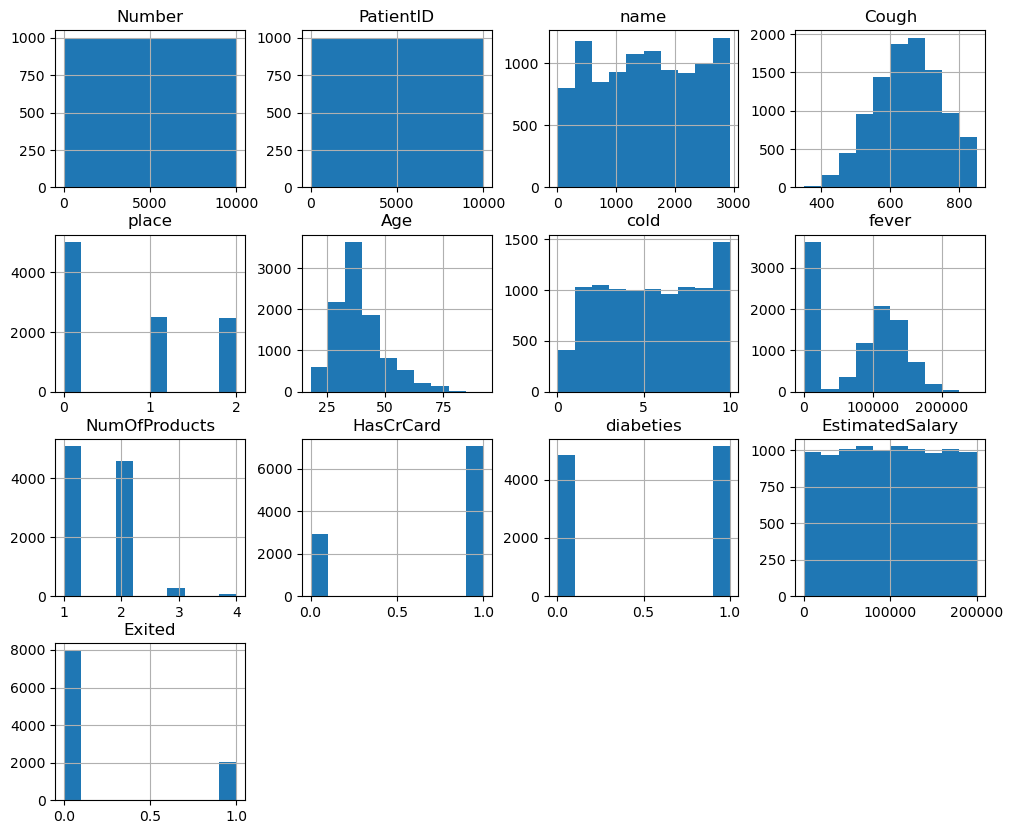

In [12]:
data.hist(figsize=(12,10))

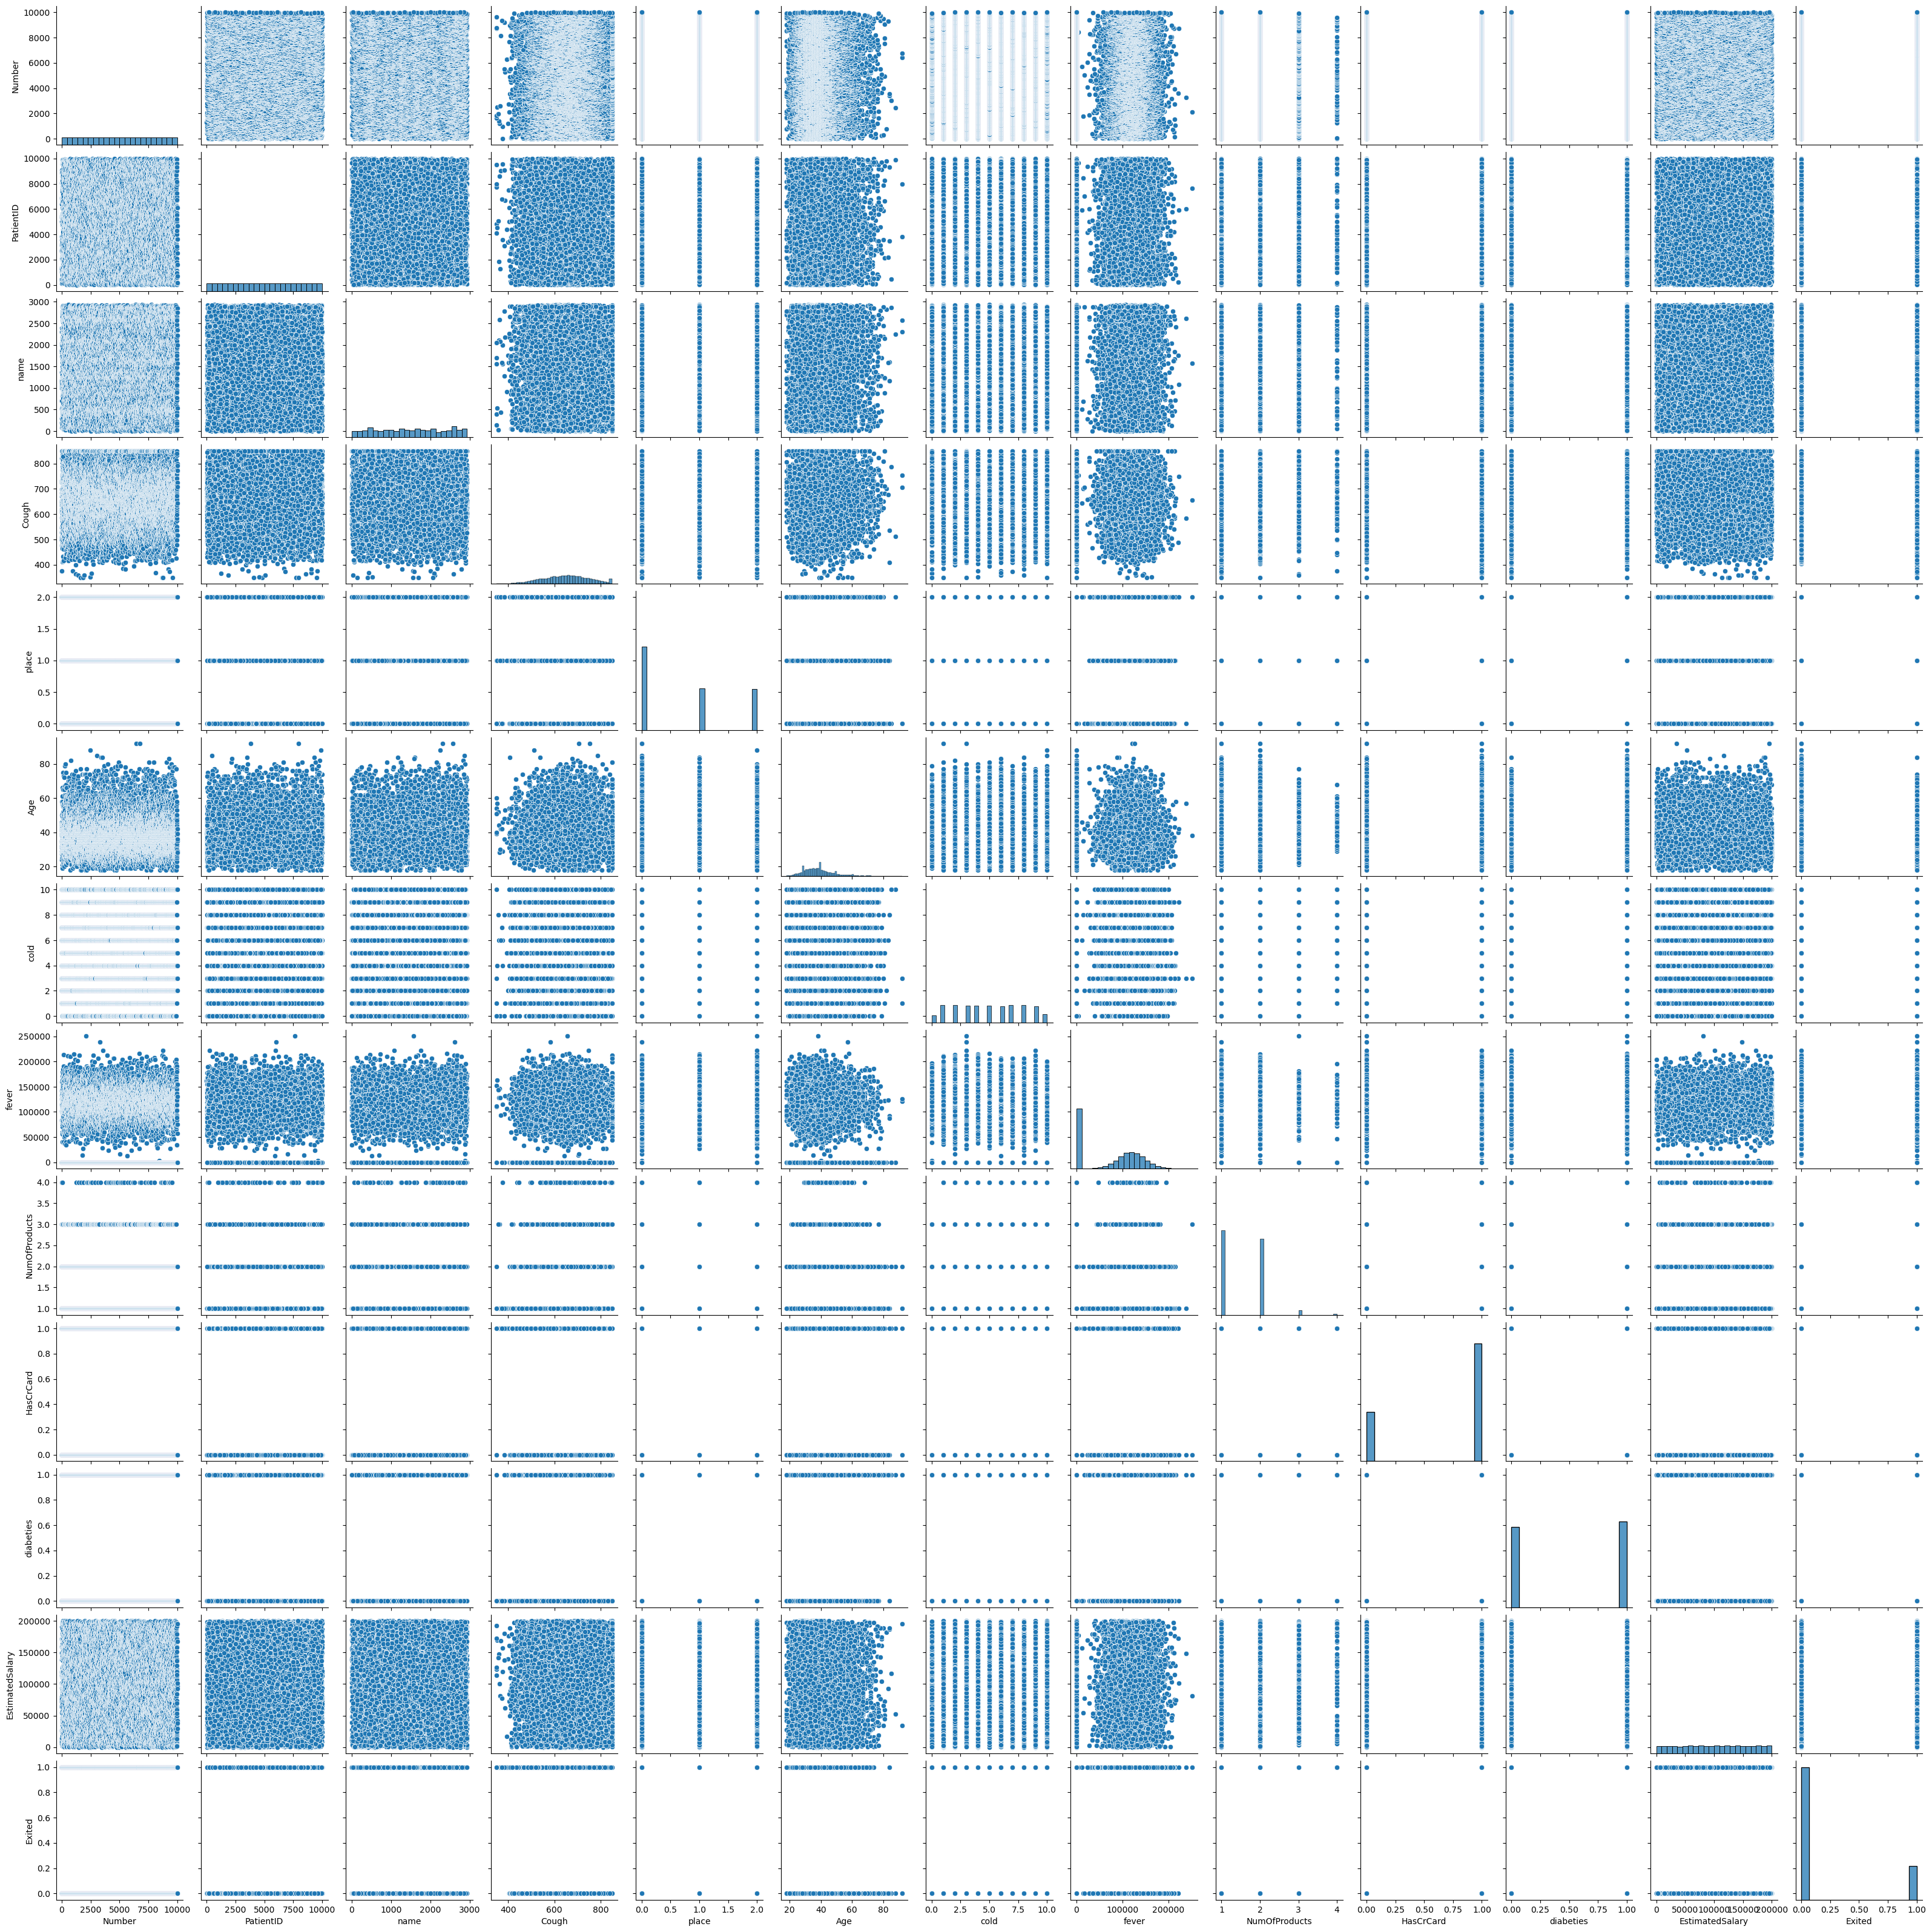

In [13]:
sns.pairplot(data)

To calculate the prior probabilities P(Condition) and P(No Condition) based on the class distribution, need to know the number of instances in each class. Let's assume:

- Number of instances with the "Condition" = N_C
- Number of instances with "No Condition" = N_NC

Then, calculate the prior probabilities as follows:

P(Condition) = N_C / (N_C + N_NC)
P(No Condition) = N_NC / (N_C + N_NC)

These probabilities represent the proportion of instances in each class relative to the total number of instances.

To convert medical test results and patient information into suitable features for a Naive Bayes model:

Categorical Data: Encode categorical information (e.g., gender, symptoms) as binary variables (0 or 1) for each category.

Continuous Data: Discretize continuous data (e.g., age) into bins or use probability density functions.

Feature Selection: Choose relevant features and remove noise or irrelevant data.

Text Data: Convert text-based information (e.g., medical notes) into numerical features

Feature selection or dimensionality reduction is important in medical diagnosis for the following reasons:

1. Improved Model Performance: It reduces noise and overfitting, leading to more accurate and reliable diagnostic models.

2. Computational Efficiency: Fewer features result in faster model training and inference, critical for real-time or large-scale applications.

3. Interpretability: It simplifies the model, making it easier for healthcare professionals to understand and trust the diagnostic process.

4. Data Quality: By focusing on relevant features, it helps ensure the quality and relevance of data used for diagnosis.

5. Ethical and Privacy Considerations: Reducing the number of features can help protect sensitive patient information.

Overall, feature selection and dimensionality reduction enhance the effectiveness and practicality of medical diagnosis models.

In [14]:
x=data.iloc[:,1:3]
x.head()

PatientID  name
0       2736  1115
1       3258  1177
2       2104  2040
3       5435   289
4       6899  1822

In [15]:
y=data.iloc[:,3:4]
y.head()

Cough
0    619
1    608
2    502
3    699
4    850

# Gaussian Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print('Training Data Shape')
print()
print('Training data-X- shape:\t',xtrain.shape)
print()
print('Training data-Y- shape:\t',ytrain.shape)
print()
print('Testing Data Shape')
print()
print('Testing data(X-Input) shape:\t',xtest.shape)
print()
print('Testing data(Y-Input) shape:\t',ytest.shape)

Training Data Shape

Training data-X- shape:	 (8000, 2)

Training data-Y- shape:	 (8000, 1)

Testing Data Shape

Testing data(X-Input) shape:	 (2000, 2)

Testing data(Y-Input) shape:	 (2000, 1)


In [44]:
bayes_model=GaussianNB()
print('***Naive Bayes Gaussian********')
print('Training Phase\n')
bayes_model. fit (xtrain, ytrain)
print('Training is completed')
print('*'*100)
print()
print('Testing Phase\n')
ypred=bayes_model.predict(xtest)
print('Prdicted Class Labels are: \n',ypred)
print('Test is also done')
print()
print('*'*100)

***Naive Bayes Gaussian********
Training Phase

Training is completed
****************************************************************************************************

Testing Phase

Prdicted Class Labels are: 
 [850 850 850 ... 850 850 850]
Test is also done

****************************************************************************************************


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification report :\n',classification_report(ytest,ypred))

Accuracy Score:	 0.021

Confusion Matrix:
 [[ 0  0  0 ...  0  0  2]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  1]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  4]
 [ 0  0  0 ...  0  0 42]]

Classification report :
               precision    recall  f1-score   support

         350       0.00      0.00      0.00         2
         351       0.00      0.00      0.00         1
         401       0.00      0.00      0.00         1
         405       0.00      0.00      0.00         1
         410       0.00      0.00      0.00         1
         411       0.00      0.00      0.00         2
         414       0.00      0.00      0.00         1
         415       0.00      0.00      0.00         1
         416       0.00      0.00      0.00         1
         418       0.00      0.00      0.00         1
         420       0.00      0.00      0.00         1
         421       0.00      0.00      0.00         1
         422       0.00      0.00      0.00         1
         425      

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metr

# Multinomial Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB
bayes_model=MultinomialNB()
print('***Naive Bayes Multinomial********')
print('Training Phase\n')
bayes_model. fit (xtrain, ytrain)
print('Training is completed')
print('*'*100)
print()
print('Testing Phase\n')
ypred=bayes_model.predict(xtest)
print('Prdicted Class Labels are: \n',ypred)
print('Test is also done')
print()
print('*'*100)

***Naive Bayes Multinomial********
Training Phase

Training is completed
****************************************************************************************************

Testing Phase

Prdicted Class Labels are: 
 [358 776 358 ... 645 426 843]
Test is also done

****************************************************************************************************


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification report :\n',classification_report(ytest,ypred))

Accuracy Score:	 0.0035

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]]

Classification report :
               precision    recall  f1-score   support

         350       0.00      0.00      0.00         2
         351       0.00      0.00      0.00         1
         358       0.00      0.00      0.00         0
         359       0.00      0.00      0.00         0
         365       0.00      0.00      0.00         0
         367       0.00      0.00      0.00         0
         401       0.00      0.00      0.00         1
         405       0.00      0.00      0.00         1
         407       0.00      0.00      0.00         0
         408       0.00      0.00      0.00         0
         410       0.00      0.00      0.00         1
         411       0.00      0.00      0.00         2
         412       0.00      0.00      0.00         0
         414       0.00      0.00      0.00         1

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metr

# Bernoulli Naive Bayes

In [49]:
from sklearn.naive_bayes import BernoulliNB
bayes_model=BernoulliNB()
print('***Naive Bayes Bernoulli********')
print('Training Phase\n')
bayes_model. fit (xtrain, ytrain)
print('Training is completed')
print('*'*100)
print()
print('Testing Phase\n')
ypred=bayes_model.predict(xtest)
print('Prdicted Class Labels are: \n',ypred)
print('Test is also done')
print()
print('*'*100)

***Naive Bayes Bernoulli********
Training Phase

Training is completed
****************************************************************************************************

Testing Phase

Prdicted Class Labels are: 
 [850 850 850 ... 850 850 850]
Test is also done

****************************************************************************************************


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification report :\n',classification_report(ytest,ypred))

Accuracy Score:	 0.021

Confusion Matrix:
 [[ 0  0  0 ...  0  0  2]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  1]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  4]
 [ 0  0  0 ...  0  0 42]]

Classification report :
               precision    recall  f1-score   support

         350       0.00      0.00      0.00         2
         351       0.00      0.00      0.00         1
         401       0.00      0.00      0.00         1
         405       0.00      0.00      0.00         1
         410       0.00      0.00      0.00         1
         411       0.00      0.00      0.00         2
         414       0.00      0.00      0.00         1
         415       0.00      0.00      0.00         1
         416       0.00      0.00      0.00         1
         418       0.00      0.00      0.00         1
         420       0.00      0.00      0.00         1
         421       0.00      0.00      0.00         1
         422       0.00      0.00      0.00         1
         425      

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Laplace (add-one) smoothing is a technique used to address the problem of zero probabilities in probabilistic models. It involves adding one count to each possible outcome in a categorical distribution to ensure that no probability is exactly zero.

In the context of medical diagnosis, Laplace smoothing can be applied to Bayesian classifiers, such as Naive Bayes, to handle situations where certain symptoms or conditions have not been observed in the training data. By adding one count to all possible symptoms or conditions, the model becomes more robust and can make predictions even when facing previously unseen data. This is valuable in medical diagnosis, where rare or unusual conditions may not have sufficient training examples.

Laplace smoothing can have both positive and negative impacts on model performance:

Positive Impact:
1. Reduces overfitting: Laplace smoothing prevents zero probabilities, making the model less likely to assign extreme probabilities to rare events.
2. Robustness: It allows the model to handle unseen or rare data points, improving generalization.

Negative Impact:
1. Smoothing bias: It can introduce bias by artificially inflating probabilities for all events, potentially impacting the model's accuracy when there's enough training data.
2. Trade-off: There's a trade-off between reducing overfitting and introducing bias. The optimal smoothing parameter must be chosen carefully.

The impact of Laplace smoothing depends on the specific dataset and context, and it should be chosen wisely to balance between overfitting and robustness.

Accurate medical diagnosis is crucial in healthcare and research for the following reasons:

1. Patient Care: It ensures timely and appropriate treatment, improving patient outcomes and quality of life.

2. Cost-Efficiency: Accurate diagnosis helps avoid unnecessary tests and treatments, reducing healthcare costs.

3. Public Health: Accurate diagnoses enable the tracking and management of diseases, contributing to public health efforts.

4. Research Advancement: Reliable diagnoses are fundamental for medical research, leading to the development of new treatments and interventions.

5. Data Analysis: Accurate diagnoses provide high-quality data for epidemiological studies and healthcare policy planning.

Practical implications of implementing a diagnostic system based on Naive Bayes:

1. Speed and Efficiency: Naive Bayes is computationally efficient, making it suitable for real-time diagnosis in healthcare settings.

2. Interpretable Results: The model's simplicity allows for easy interpretation by healthcare professionals, enhancing trust.

3. Limited Expressiveness: Naive Bayes assumes independence among features, potentially limiting its ability to capture complex relationships in medical data.

4. Data Quality: The system's accuracy heavily relies on the quality and completeness of training data.

5. Sensitivity to Feature Selection: Careful feature selection is crucial to the system's performance, as irrelevant or noisy features can impact results.

6. Continuous Improvement: Continuous updates and monitoring of the system are necessary to adapt to evolving medical knowledge and changing patient demographics.

7. Ethical and Privacy Considerations: Proper handling of patient data and maintaining confidentiality are essential.

In practice, Naive Bayes can be a valuable tool for medical diagnosis, but its limitations and practical considerations must be carefully addressed.

Potential limitations of the Naive Bayes approach to medical diagnosis:

1. Independence Assumption: Naive Bayes assumes feature independence, which may not hold in complex medical data, such as symptoms related to multiple conditions.

2. Limited Modeling: It may not capture subtle or non-linear relationships among features, leading to less accurate predictions in intricate medical cases.

3. Data Quality: Performance depends on high-quality and representative training data; missing or biased data can affect accuracy.

4. Rare Events: Naive Bayes struggles with rare events or conditions that have limited training examples.

5. Sensitivity to Feature Selection: The choice of relevant features is critical, and including irrelevant ones can introduce noise.

6. Overconfidence: The model can be overconfident when making predictions if certain feature values are not observed in the training data.

In scenarios where feature independence doesn't hold, complex relationships exist, or data quality is poor, Naive Bayes may not perform well in medical diagnosis.